In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv', low_memory=False)

# Display the first few rows
data.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [2]:
# Get info about column types/counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

In [3]:
# Get mean, std, min/max, etc. of values in each column
data.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,6.821540e+05,6.821540e+05,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,6.821540e+05,...,682154.000000,682154.000000,682154.000000,6.821540e+05,682132.000000,682154.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,2.017975e+09,2.017975e+13,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,2.369743e+06,...,8.319154,11.047989,9.762570,2.446079e+06,6.910340,4.227626,253.414628,8.401587,62.010066,54.741563
std,7.844593e+05,7.844593e+09,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,6.053648e+05,...,3.818716,10.095556,9.532945,4.833287e+05,0.985065,6.449866,48.469869,4.808791,17.071117,25.146693
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,2.000000,-15.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017113e+09,2.017113e+13,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,2.532989e+06,...,6.000000,3.000000,0.000000,2.540269e+06,6.000000,1.000000,210.000000,4.000000,50.000000,43.000000
50%,2.018101e+09,2.018101e+13,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,2.550541e+06,...,10.000000,10.000000,7.000000,2.555224e+06,7.000000,3.000000,245.000000,8.000000,64.000000,59.000000
75%,2.019091e+09,2.019091e+13,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,2.556445e+06,...,10.000000,17.000000,16.000000,2.558116e+06,7.000000,6.000000,305.000000,12.000000,75.000000,71.000000
max,2.019112e+09,2.019113e+13,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.563364e+06,...,40.000000,57.000000,59.000000,2.563327e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


In [4]:
# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


Missing Values:
WindDirection        104676
WindSpeed             91872
Temperature           63646
GameWeather           60170
StadiumType           41690
FieldPosition          8602
Humidity               6160
OffenseFormation         88
Dir                      28
Orientation              23
DefendersInTheBox        22
dtype: int64


Convert PlayerHeight to inches

In [5]:
print("Before:")
print(data['PlayerHeight'].head())

Before:
0    6-0
1    6-3
2    6-3
3    6-3
4    6-0
Name: PlayerHeight, dtype: object


In [6]:
# Convert PlayerHeight to inches (5-11 -> 71)
def convert_to_inches(height):
    feet, inches = map(int, height.split('-'))
    return feet * 12 + inches

data['PlayerHeight'] = data['PlayerHeight'].apply(convert_to_inches)

print("After:")
print(data['PlayerHeight'].head())

After:
0    72
1    75
2    75
3    75
4    72
Name: PlayerHeight, dtype: int64


... continue Data Cleaning?

- fix stadium names and team names
- remove/condense less relevant columns

Univariate Analysis

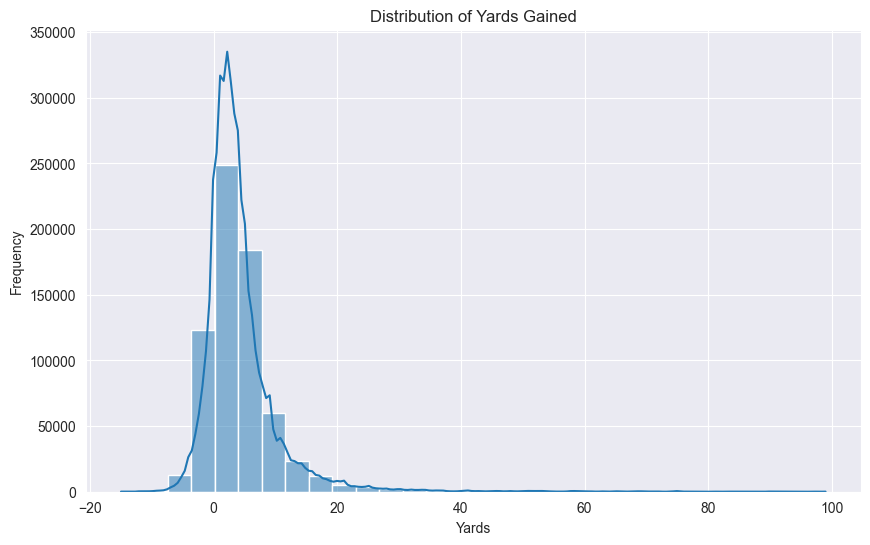

In [7]:
# Visualization of target variable (Yards)
plt.figure(figsize=(10, 6))
sns.histplot(data['Yards'], kde=True, bins=30)
plt.title('Distribution of Yards Gained')
plt.xlabel('Yards')
plt.ylabel('Frequency')
plt.show()

Bivariate analysis: let's now visualize the relationship between our target (yards gained) and other key columns to gain a better understanding of how these features influence the target.

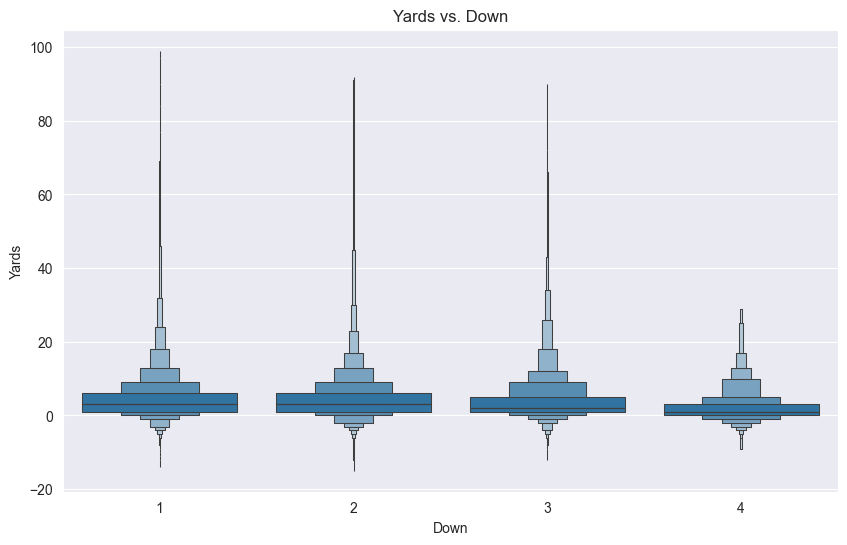

In [8]:
# Visualize yards gained depending on the down
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Down', y='Yards', data=data)
plt.title('Yards vs. Down')
plt.show()

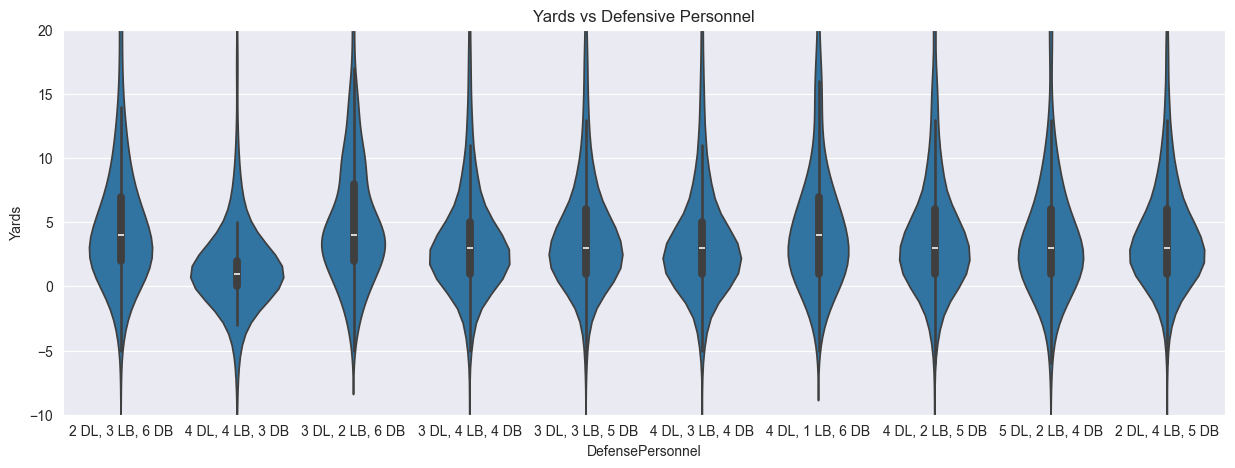

In [30]:
# Visualize yards gained depending on the defensive setup
n = 10

top_n_defenses = data.groupby('DefensePersonnel')['GameId'].count().sort_values(ascending=False).index[:n].tolist()
data_play = data.groupby('PlayId').first()
data_topn_def = data_play.loc[data_play['DefensePersonnel'].isin(top_n_defenses)]

fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x='DefensePersonnel', y='Yards', data=data_topn_def, ax=ax)
plt.ylim(-10, 20)
plt.title('Yards vs Defensive Personnel')
plt.show()

Correlations / Column analysis & cleaning examples

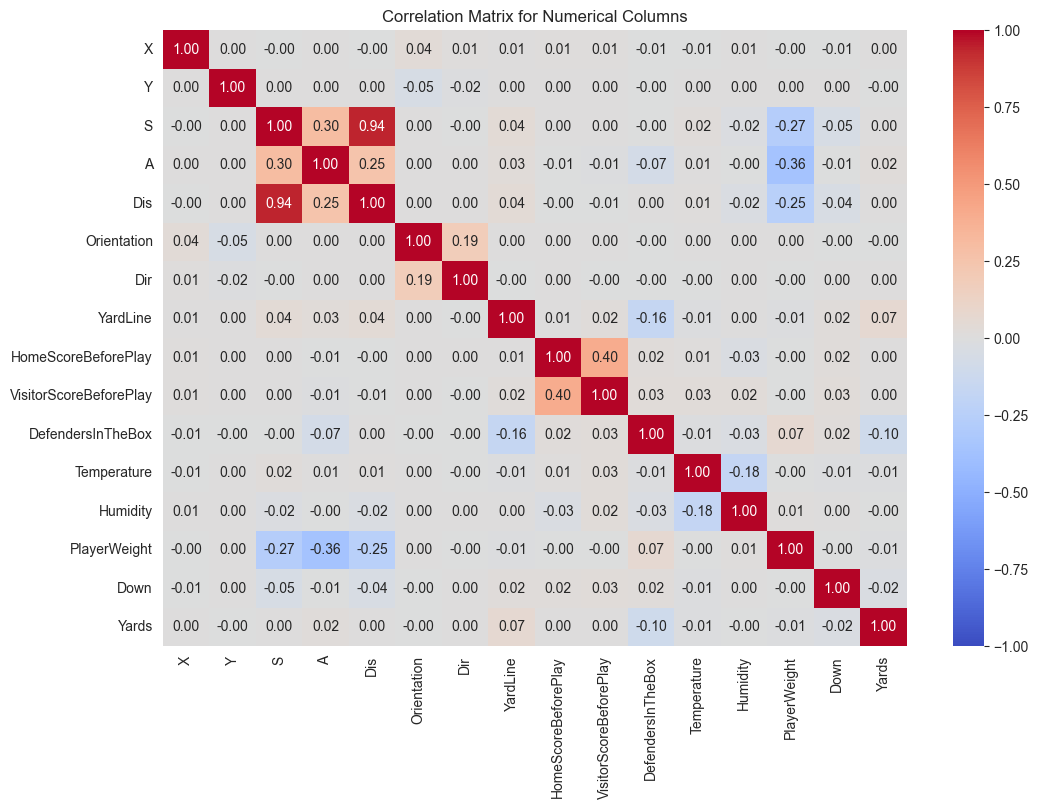

In [10]:
# Heatmap of correlation between Yards and Numerical Columns
numerical_columns = [
    'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'YardLine',
    'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'DefendersInTheBox',
    'Temperature', 'Humidity', 'PlayerWeight', 'Down'
] 

# Correlation matrix
corr_matrix = data[numerical_columns + ['Yards']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

Let's discuss some observations from the matrix above:
* high correlation (0.94) between S (speed of player) and Dis (distance traveled by player)
* Correlation between Yards and other features is frequently near 0
    * Exceptions:
        * Correlation between Yards and YardLine
        * Negative correlation between Yards and DefendersInTheBox

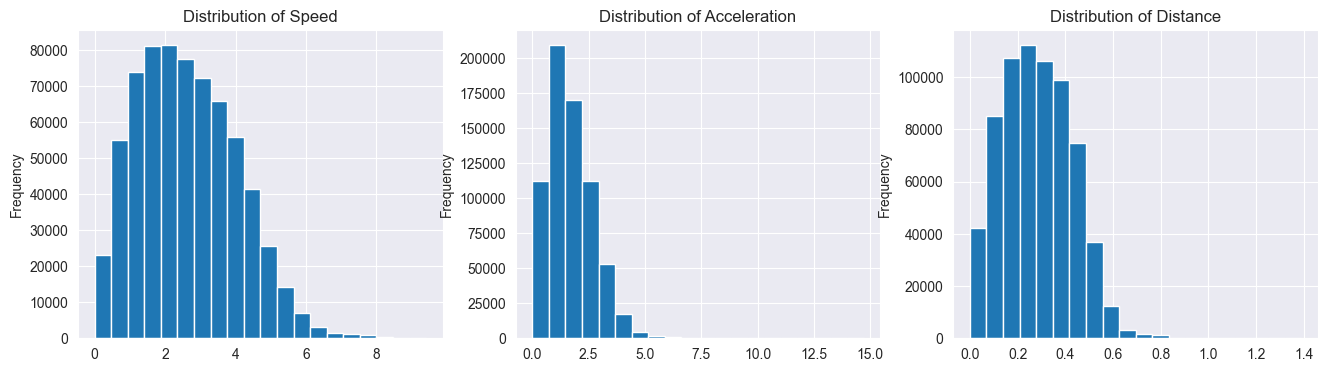

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
data['S'].plot(kind='hist', ax=ax1, title='Distribution of Speed', bins=20)
data['A'].plot(kind='hist', ax=ax2, title='Distribution of Acceleration', bins=20)
data['Dis'].plot(kind='hist', ax=ax3, title='Distribution of Distance', bins=20)
plt.show()

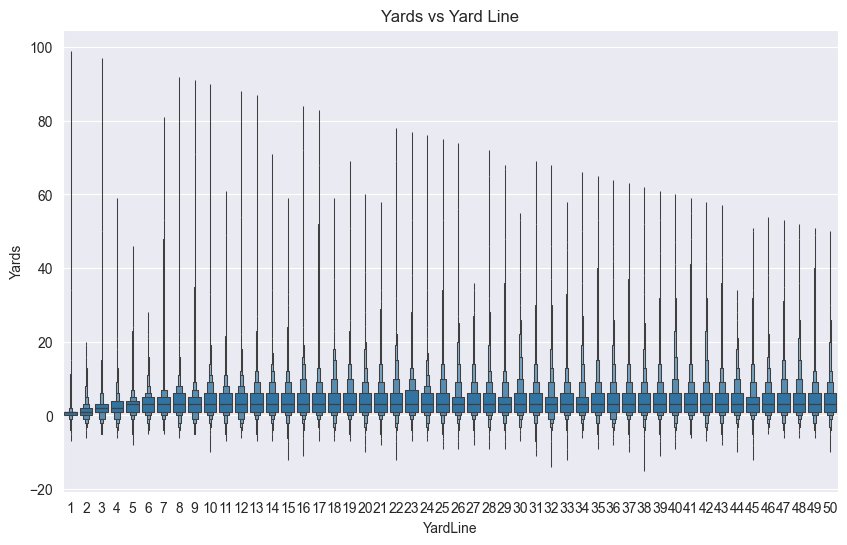

In [32]:
# Visualize yards gained depending on the yard line
plt.figure(figsize=(10, 6))
sns.boxenplot(x='YardLine', y='Yards', data=data)
plt.title('Yards vs Yard Line')
plt.show()

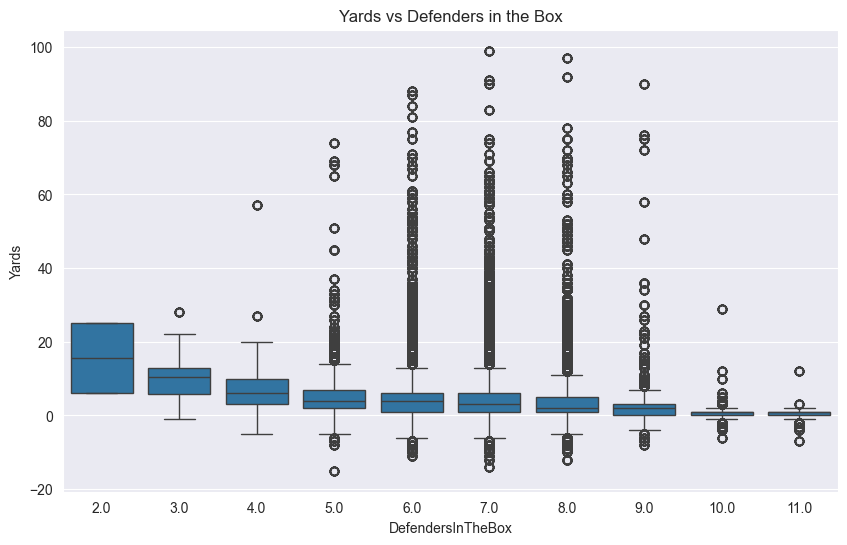

In [31]:
# Visualize yards gained depending on the number of defenders in the box
plt.figure(figsize=(10, 6))
sns.boxplot(x='DefendersInTheBox', y='Yards', data=data)
plt.title('Yards vs Defenders in the Box')
plt.show()

In [11]:
print(data.columns)

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')


In [12]:
# Explore categorical variables
categorical_columns = [
    'Team', 'Season', 'PossessionTeam', 'FieldPosition', 
    'OffenseFormation', 'DefensePersonnel', 'PlayDirection', 
    'StadiumType', 'Turf', 'GameWeather', 'Position'
]

print("\nCategorical Variable Unique Counts:")
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")


Categorical Variable Unique Counts:
Team: 2 unique values
Season: 3 unique values
PossessionTeam: 32 unique values
FieldPosition: 32 unique values
OffenseFormation: 8 unique values
DefensePersonnel: 45 unique values
PlayDirection: 2 unique values
StadiumType: 33 unique values
Turf: 23 unique values
GameWeather: 73 unique values
Position: 25 unique values


In [13]:
print(data['Season'].unique())

[2017 2018 2019]


In [14]:
# Label Encoding: 
data['SeasonLabelEncoded'] = data['Season'].map({2017: 0, 2018: 1, 2019: 2})
print(data['SeasonLabelEncoded'].head(3))

data = data.drop('SeasonLabelEncoded', axis=1)

0    0
1    0
2    0
Name: SeasonLabelEncoded, dtype: int64


In [15]:
# One-Hot Encoding: converting to Binary columns
data = pd.get_dummies(data, columns=['Season'], prefix='Season')
print(data['Season_2017'].head(3))
print(data['Season_2018'].head(3))
print(data['Season_2019'].head(3))

0    True
1    True
2    True
Name: Season_2017, dtype: bool
0    False
1    False
2    False
Name: Season_2018, dtype: bool
0    False
1    False
2    False
Name: Season_2019, dtype: bool


In [16]:
print(data['GameWeather'].unique())

['Clear and warm' 'Sun & clouds' 'Sunny' 'Controlled Climate'
 'Mostly Sunny' 'Clear' nan 'Indoor' 'Mostly Cloudy' 'Mostly Coudy'
 'Partly sunny' 'Partly Cloudy' 'Cloudy' 'Sunny, highs to upper 80s'
 'Indoors' 'Light Rain' 'Showers' 'Partly cloudy' 'Partly Sunny'
 '30% Chance of Rain'
 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.'
 'Rain' 'Cloudy, fog started developing in 2nd quarter' 'Coudy'
 'Rain likely, temps in low 40s.' 'Cold' 'N/A (Indoors)' 'Clear skies'
 'cloudy' 'Fair' 'Mostly cloudy' 'Cloudy, chance of rain'
 'Heavy lake effect snow' 'Party Cloudy'
 'Cloudy, light snow accumulating 1-3"' 'Cloudy and cold' 'Snow' 'Hazy'
 'Scattered Showers' 'Cloudy and Cool' 'N/A Indoor' 'Rain Chance 40%'
 'Clear and sunny' 'Mostly sunny' 'Sunny and warm' 'Partly clear'
 'Cloudy, 50% change of rain' 'Clear and Sunny' 'Sunny, Windy'
 'Clear and Cool' 'Sunny and clear' 'Mostly Sunny Skies' 'Partly Clouidy'
 'Clear Skies' 'Sunny Skies' 'Overcast' 'T: 51; H: 

In [17]:
#data = data.drop(columns=['GameWeather'])

def categorize_weather(weather):
    if pd.isna(weather):
        return 'Unknown'
    weather = weather.lower()
    if 'clear' in weather or 'sunny' in weather or 'fair' in weather:
        return 'Clear'
    elif 'cloud' in weather or 'overcast' in weather or 'hazy' in weather:
        return 'Cloudy'
    elif 'rain' in weather or 'shower' in weather or 'drizzle' in weather:
        return 'Rainy'
    elif 'snow' in weather or 'cold' in weather:
        return 'Snowy'
    elif 'indoor' in weather or 'controlled climate' in weather:
        return 'Indoor'
    else:
        return 'Other'

data['GameWeather'] = data['GameWeather'].apply(categorize_weather)
print(data['GameWeather'].value_counts())


GameWeather
Clear      261008
Cloudy     260920
Unknown     60170
Indoor      49060
Rainy       39754
Snowy        6050
Other        5192
Name: count, dtype: int64


In [18]:
data = pd.get_dummies(data, columns=['GameWeather'], prefix='GameWeather')

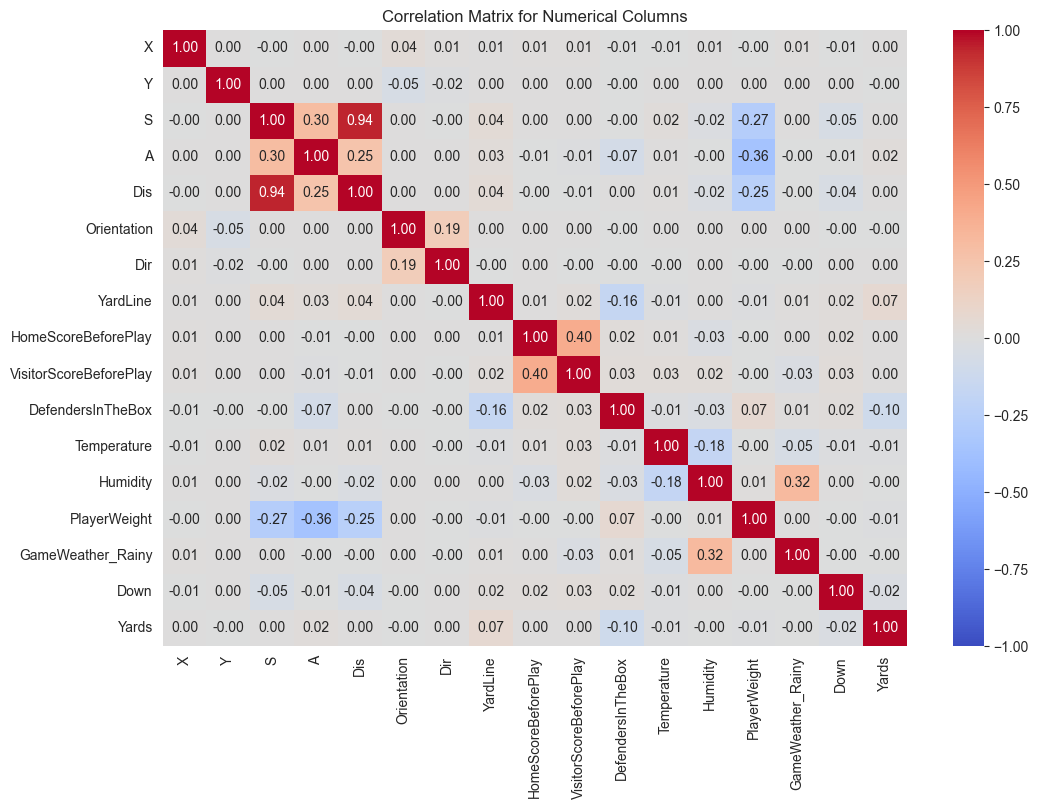

In [20]:
# Heatmap of correlation between Yards and Numerical Columns
numerical_columns = [
    'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'YardLine',
    'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'DefendersInTheBox',
    'Temperature', 'Humidity', 'PlayerWeight', 'GameWeather_Rainy',
    'Down'
]  # Includes GameWeather_Rainy (One-Hot Encoded)

# Correlation matrix
corr_matrix = data[numerical_columns + ['Yards']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()